# Analisi dei tweet del presidente Trump dal 2009-05-04 al 2020-01-20
## Cosa vogliamo fare?
- Analisi dei dati (andamento dei like, retweet, ecc)
- Occorrenza di parole
- Conteggio di mistyping
![donnie](donnie.jpg)

## Operazioni generali

In [18]:
import re 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

occ = pd.read_csv("datas/Dataframe_word-occurances-Twitter-Trump.csv")
top = occ.head(25)

In [ ]:
df = pd.read_csv("datas/trumptweets.csv")

df = df.iloc[:, 2:6] # prendo solo le colonne che mi interessano
df.head()

## Occorrenza di parole 
<br>
Per prima cosa ho estratto tutti i contenuti dei tweet dal database, poi ne ho creato una lista, che ho salvato su un file testo. Per ogni riga del file vi era un parola con il relativo numero di volte che era stata trovata nei tweet nel formato: *parola num_occorrenze*, ho eliminato tutte le parole con occorrenza=1, poichè per la maggior parte erano mistyping, url o altre fonti di rumore dei dati.


### Word_list
Utilizziamo questa classe per creare una lista di numbered_word con alcuni metodi utili
#### Parametri:

- **list:** list di nubered_word 
      la lista dove metteremo tutte le parole con le relative occorrenze
      
#### Metodi:

- **add_word(new_word):** void
      aggiunge la parola se non è già presente nella lista, altrimenti ne incrementa di uno l'occorrenza


In [ ]:
class numbered_word(object): # definisco una classe, la utilizzo come sturct per memorizzare word e relative occorrenze
    def __init__(self, word):
        self.word = word
        self.occured = 1
    def occurance(self):
        self.occured += 1
        
        
class word_list(object): # definisco una classe lista per la conta delle occorrenze
    def __init__(self):
        self.list = []
    
    
    def add_word(self, new_word): # se la parola esiste già nella list aumento le volte che è occorsa altrimenti la aggiugno
        for item in self.list:
            if new_word == item.word:
                item.occurance()
                return
        self.list.append(numbered_word(new_word))
    
    
    def display(self): # stampa della lista
        for item in self.list:
            print(item.word + " " + str(item.occured))
        


In [ ]:
# commentato perchè pesante computazionalmente, i dati estratti sono stati importati dopo da un file ottenuto
# dal primo run di queste righe, comunque conta quante volte ogni parola è stata scritta
"""
list = word_list()
for content in df.iloc[:, 0]:
    content = content.split()
    for word in content:
        # str.maketrans crea una tavola di traduzione che è l'oggetto che richiede .translate, poi translate elimina  
        # la punteggiatura, lo fa sostituendo il primo carattere al secondo e poi niente al terzo array 
        list.add_word(word.translate(str.maketrans('', '', string.punctuation + '“' + '”' + '…')).lower())
list.display()
"""

In [ ]:
# creo due liste con word e occorrenze per farne un dataset sucessivamente

# 'Words in Donnie's Tweet.txt' e il text file che ho ottenuto dal copia-incolla dell'output precedente in un .txt
f = open("datas/Words in Donnie's Tweet.txt", "r", encoding='utf-8') 
lines = f.readlines() 
wrds = []
occurances = []
n = 0

for l in lines:
    try:
        l = l.split(' ')
        l[1] = l[1][:-1]
        wrds.append(str(l[0]))
        occurances.append(l[1])
    except IndexError:
        print("index error alla riga: ", l)
        n += 1
    
        
        
print("Errori: ", n)
for word, occurance in zip(wrds, occurances):
    print(str(word) + " " + occurance)
    break

print("Righe del file:", len(lines))
print("Righe delle 2 liste:", len(wrds))
print("Righe scomparse:", len(lines) - len(wrds))
print("Total words:", len(wrds))
print("Total occurances:", len(occurances))

In [ ]:
# Come si può vedere dall'output precedente il file aveva più righe dei 2 vettori, per controllare che non vi fossero 
# data leaks ho eseguito alcuni test con la libreria re, è risultato che venivano saltate(giustamente) delle righe
# contenenti '\n'
actual_n =0 
n =0
i = 0
for l in lines:
    try:
        actual_n += int(re.search(" \d{1,6}", l)[0])
    except TypeError:
        #print(l)
        i+=1
        
for occurance in occurances:
    n += int(occurance)

print("Righe saltate:", i)
print("Numero totale di parole estratto dal file", actual_n)
print("Numero totale di parole estratto dalla lista words", n)

In [ ]:
# creo un nuovo dataset con le parole e le relative occorenze
data = list(zip(wrds, occurances))
occ = pd.DataFrame(data, columns=['Word', 'Occurance']) 
# print("Numero parole:", len(pd.unique(occ.iloc[:,0])))
# print(pd.unique(occ.iloc[:,0]))

### Manipolazione del database

In questa cella eseguo tutte le manipolazioni del database ritenute necessarie
- drop dei valori NaN
- drop di tutti i valori che iniziano con una cifra (erano per lo più numeri o parole ininfluenti)
- drop di tutti i valori con occorrenza = 1 (erano url, mistyping o altre cose ininfluenti)
- ordinamento per occorrenze
- conversione della colonna occorenze in interi

In [ ]:
occ.head()

In [ ]:
#questa parte mi da un array degli indici che poi vengono dati a drop
#occ = occ.dropna()

occ['Occurance'] = occ['Occurance'].astype(int)
to_drop = occ[occ['Word'].str[0].isin(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])].index 
occ = occ.drop(to_drop)
occ = occ.drop(occ[occ['Occurance'] == 1].index)
occ = occ.drop(occ[occ['Word'] == ""].index)

occ = occ.sort_values(by='Occurance', ascending=False)
occ.head()

### Salvataggio su file .csv

In [ ]:
occ.to_csv('datas/Dataframe_word-occurances-Twitter-Trump.csv', index = False)

### Grafico a barre orizzontali delle occorrenze

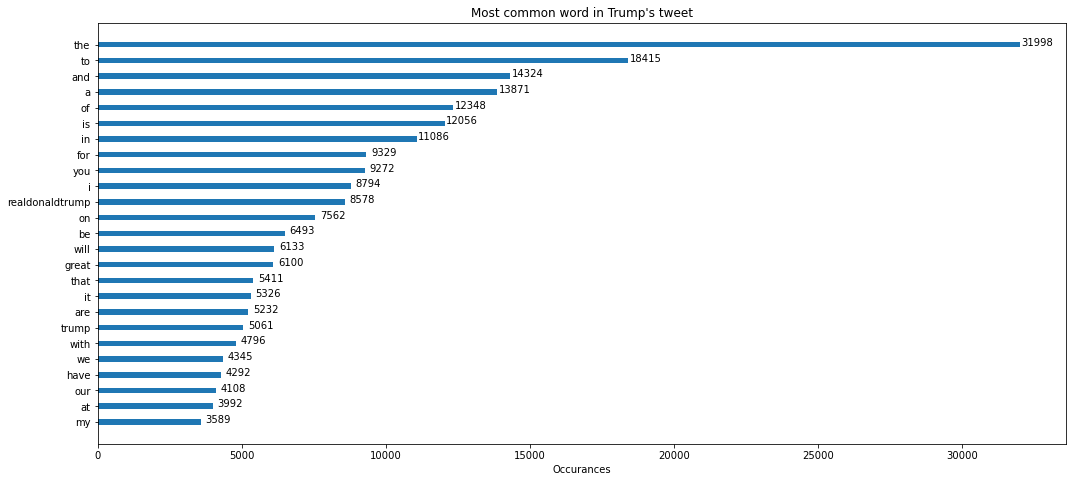

In [100]:
width = 0.35

top = top.iloc[::-1] # per girare se esce al contrario

fig, ax = plt.subplots(figsize=[15, 6.8])
# barre = ax.bar(top['Word'], top['Occurance'], width, label='Words')
barre = ax.barh(top['Word'], top['Occurance'], width, label='Words')

ax.set_xlabel('Occurances')
ax.set_title('Most common word in Trump\'s tweet')


for barra in barre:
    width = barra.get_width()
    ax.annotate('{}'.format(width), # annotazione dei numeri sopra ogni barra
                    xy=(width + 600, barra.get_y()), # posizione dell'etichetta rispetto alla mappa (+ 600 per non far sovrapporre il numero alla barra)
                    xytext=(0, 0), # posizione rispetto alla barra
                    textcoords="offset points", # definisce in che modo legge xy
                    ha='center', va='bottom') # allineamento

fig.tight_layout() # metodo che non fa uscire dal grafico etichette dgli assi e titolo
#fig.savefig('output_graphs/horizontal_bar.png')
plt.show()

### Grafico a barre verticali delle occorrenze

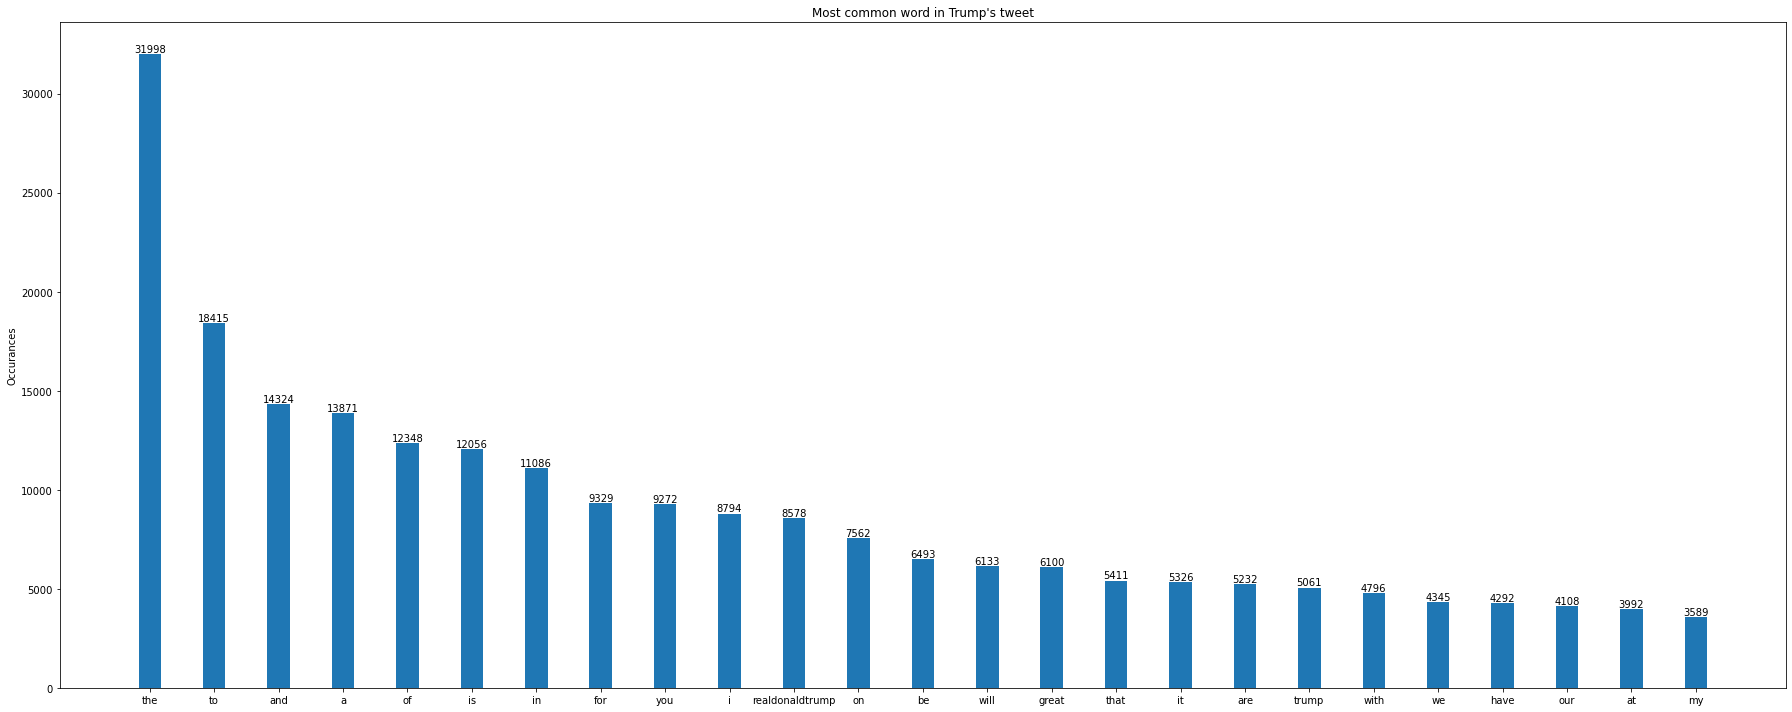

In [99]:
width = 0.35

top = top.iloc[::-1] # per girare se esce al contrario

fig, ax = plt.subplots(figsize=[25, 10])
# barre = ax.bar(top['Word'], top['Occurance'], width, label='Words')
barre = ax.bar(top['Word'], top['Occurance'], width, label='Words')

ax.set_ylabel('Occurances')
ax.set_title('Most common word in Trump\'s tweet')


for barra in barre:
    height = barra.get_height()
    ax.annotate('{}'.format(height), # annotazione dei numeri sopra ogni barra
                    xy=(barra.get_x() + barra.get_width()/2, height), # posizione dell'etichetta rispetto alla mappa
                    
                    xytext=(0, 0), # posizione rispetto alla barra
                    textcoords="offset points", # definisce in che modo legge xy
                    ha='center', va='bottom') # allineamento
fig.tight_layout() # metodo che non fa uscire dal grafico etichette dgli assi e titolo
#fig.savefig('output_graphs/vertical_bar.png')
plt.show()

### Diagramma scatter delle occorrenze

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4] [4 4 4 4 4 3 3 3 3 3 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0]


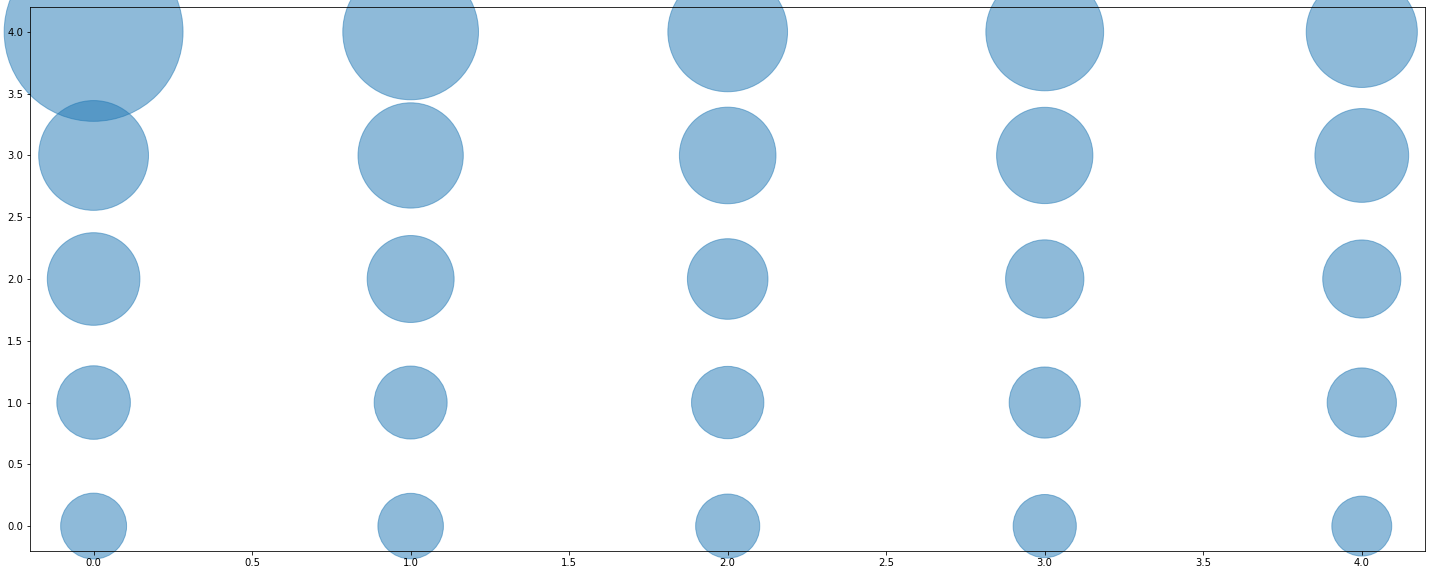

In [120]:
fig, ax = plt.subplots(figsize=[25, 10])
area = top['Occurance']
x = np.arange(25)
x = np.remainder(x, 5)
y = np.arange(0, 25)[::-1]
y = y//5
#x = np.random.choice(np.arange(0, 100000000, area.max()), replace=False, size=(25)) 
print(x, y)
scat = ax.scatter(x, y, s=area, alpha=0.5, clip_on=False)
print(scat)

fig.canvas.draw()


# fig.savefig('output_graphs/scatter_graph.png')
plt.show()
